## Preparing a Dataset for Modeling

### Assignment:
1. Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.
2. Based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.
3. Use filtering methods to select the five best features and justify your choices.

Dataset: House Sales in King County https://www.kaggle.com/harlfoxem/housesalesprediction
Outcome Variable: Price
Variables for Features: 
    - Numerical:Square foot lot, Square foot living, Square foot living 2015
    - Categorical: Bathrooms, Bedrooms, Grade

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [10]:
# Import dataset
df_input_file = pd.read_csv('kc_house_data.csv')

In [11]:
# Identify variables in dataset
columns = list(df_input_file)
print(columns)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


### Data exploration:

In [12]:
# Data exploration (univariate)
# 1. How many variables do I have? - 21 total variables
columns = df_input_file.columns.values.tolist()

# 2. How many datapoints? -21613
number_rows = len(df_input_file.index)

# 3. Which variables are continuous (having an infinite number of possible values, such as age) and
#  which are categorical (having a limited number of values, such as gender).
#  -Continuous: price, sqft_living, sqft_lot, sqft_above, sqft_basement, lat, long, sqft_living15, sqft_lot15
#  -Categorical: date, bedrooms, bathrooms, floors, waterfront,view, condition, grade, yr_built, yr_renovated, zipcode

# 4. Do I have missing data? If so, how much? - No missing data
number_null_values = df_input_file.isnull().sum()
print("number of null values by column: \n",number_null_values)

number of null values by column: 
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [13]:
# Function to test normal distribution

def normal_distribution_test(data, variable, level_of_significance, number_of_bin):
    z, p_value = stats.mstats.normaltest(data)
    if p_value < level_of_significance:
        print(variable, ': Variable is not normal: ', p_value)
    else:
        print(variable, ': Variable is normal: ', variable, p_value)
    # plt.style.use("ggplot")
    # plt.hist(x=data, bins=number_of_bin, normed=1, facecolor='b', alpha=0.75)
    # plt.xlabel(variable)
    # plt.ylabel('Probability')
    # plt.title('Histogram')
    # plt.tight_layout()
    # plt.show()

In [14]:
# Data exploration (univariate) - continued

# 5. Are any of my variables have a known probability distribution (normal, Poisson, Gamma, etc)?
#   make new dataframes for categorical and numerical variables of interest

# test distribution of numerical data for normal distribution
df_house_sales_numerical = df_input_file.loc[:,['sqft_living','sqft_lot','sqft_living15','price']]

#perform normal distribution test on numerical data sqft_living
data = df_house_sales_numerical["sqft_living"].astype(float)
normal_distribution_test(data, 'square feet living space raw data', 0.05, 50)

#perform normal distribution test on numerical data sqft_living 2015
data = df_house_sales_numerical["sqft_living15"].astype(float)
normal_distribution_test(data, 'square feet living space 2015 - raw', 0.05, 50)

#perform normal distribution test on numerical data sqft_lot
data = df_house_sales_numerical["sqft_lot"].astype(float)
normal_distribution_test(data, 'square feet lot space', 0.05, 50)



square feet living space raw data : Variable is not normal:  0.0
square feet living space 2015 - raw : Variable is not normal:  0.0
square feet lot space : Variable is not normal:  0.0


In [15]:
# Data exploration (univariate) - continued
# Statistical characteristics of Numerical Variables of interest
print(df_house_sales_numerical.describe())



        sqft_living      sqft_lot  sqft_living15         price
count  21613.000000  2.161300e+04   21613.000000  2.161300e+04
mean    2079.899736  1.510697e+04    1986.552492  5.400881e+05
std      918.440897  4.142051e+04     685.391304  3.671272e+05
min      290.000000  5.200000e+02     399.000000  7.500000e+04
25%     1427.000000  5.040000e+03    1490.000000  3.219500e+05
50%     1910.000000  7.618000e+03    1840.000000  4.500000e+05
75%     2550.000000  1.068800e+04    2360.000000  6.450000e+05
max    13540.000000  1.651359e+06    6210.000000  7.700000e+06


In [17]:
df_house_sales_categorical = df_input_file.loc[:, ['bathrooms','grade','bedrooms']]
result = df_house_sales_categorical["bathrooms"].value_counts()
print("FREQUENCY DISTRIBUTION FOR CATEGORICAL COLUMNS (bathrooms):")
print(result)

result = df_house_sales_categorical["bedrooms"].value_counts()
print("FREQUENCY DISTRIBUTION FOR CATEGORICAL COLUMNS (bedrooms):")
print(result)

result = df_house_sales_categorical["grade"].value_counts()
print("FREQUENCY DISTRIBUTION FOR CATEGORICAL COLUMNS (grade):")
print(result)


FREQUENCY DISTRIBUTION FOR CATEGORICAL COLUMNS (bathrooms):
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
FREQUENCY DISTRIBUTION FOR CATEGORICAL COLUMNS (bedrooms):
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
FREQUENCY DISTRIBUTION FOR CATEGORICAL COLUMNS (grade):
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


C:\Users\stace\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\stace\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


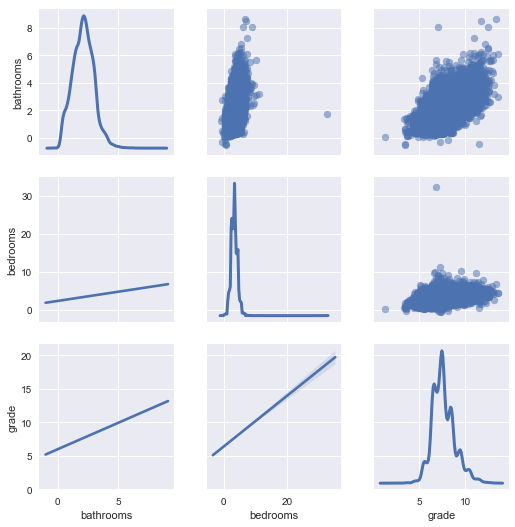

In [19]:
# bivariate data analysis
# Make a copy of the data to add jitter to and plot.
df_jittered = df_house_sales_categorical.loc[:, ['bathrooms','bedrooms','grade']]

# Making the random noise.
jitter = pd.DataFrame(np.random.uniform(-.7, .7, size=df_jittered.shape),columns=df_jittered.columns)

# Element-wise addition of noise to data
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
#
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()


### Conclusions from data analysis
1. None of the numerical data is normally distributed. I'll attempt to transform data to create a normal distribution
2. There appears to be a strong relationship between the 3 categorical variables. It is likely that they can be combined to create new features

## Creating new features:

square feet living space raw data : Variable is not normal:  0.0
log square feet living space raw data : Variable is not normal:  0.0257725417209
sqrt square feet living space raw data : Variable is not normal:  0.0
inverse square feet living space raw data : Variable is not normal:  0.0


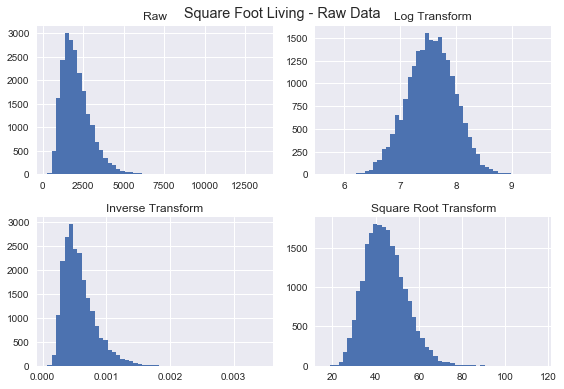

In [22]:
# Perform transformations on raw numerical data to try to get a normal distribution
#perform normal distribution test on numerical data sqft_living
data = df_house_sales_numerical["sqft_living"].astype(float)
normal_distribution_test(data, 'square feet living space raw data', 0.05, 50)

data = np.log(df_house_sales_numerical["sqft_living"].astype(float))
normal_distribution_test(data, 'log square feet living space raw data', 0.05, 50)

data = np.sqrt(df_house_sales_numerical["sqft_living"].astype(float))
normal_distribution_test(data, 'sqrt square feet living space raw data', 0.05, 50)

data = 1/df_house_sales_numerical["sqft_living"].astype(float)
normal_distribution_test(data, 'inverse square feet living space raw data', 0.05, 50)

# Making a four-panel plot for square foot living with transforms
fig = plt.figure()
fig.suptitle("Square Foot Living - Raw Data")
fig.add_subplot(221)
plt.hist(df_house_sales_numerical['sqft_living'],bins=50)
plt.title('Raw')

fig.add_subplot(222)
plt.hist((np.log(df_house_sales_numerical['sqft_living'])),bins=50)
plt.title('Log Transform')

fig.add_subplot(223)
plt.hist((1/df_house_sales_numerical['sqft_living']),bins=50)
plt.title('Inverse Transform')

fig.add_subplot(224)
plt.hist((np.sqrt(df_house_sales_numerical['sqft_living'])),bins=50)
plt.title('Square Root Transform')
plt.tight_layout()
plt.show()



square feet living space 2015 - raw : Variable is not normal:  0.0
log square feet living space raw data : Variable is not normal:  7.35980102194e-44
sqrt square feet living space raw data : Variable is not normal:  9.50914319876e-285
inverse square feet living space raw data : Variable is not normal:  0.0


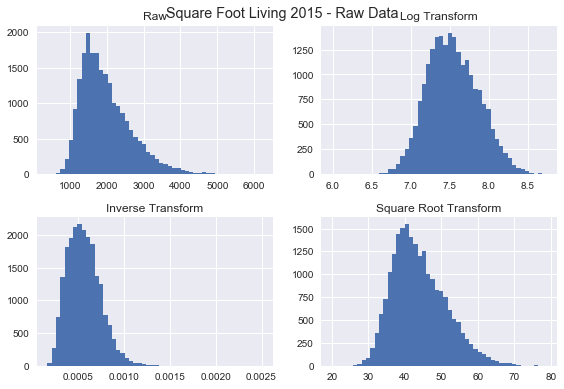

In [24]:
#perform normal distribution test on numerical data sqft_living 2015

data = df_house_sales_numerical["sqft_living15"].astype(float)
normal_distribution_test(data, 'square feet living space 2015 - raw', 0.05, 50)

data = np.log(df_house_sales_numerical["sqft_living15"].astype(float))
normal_distribution_test(data, 'log square feet living space raw data', 0.05, 50)

data = np.sqrt(df_house_sales_numerical["sqft_living15"].astype(float))
normal_distribution_test(data, 'sqrt square feet living space raw data', 0.05, 50)

data = 1/df_house_sales_numerical["sqft_living15"].astype(float)
normal_distribution_test(data, 'inverse square feet living space raw data', 0.05, 50)

# Making a four-panel plot for square foot living 2015 with transforms -raw
fig = plt.figure()
fig.suptitle("Square Foot Living 2015 - Raw Data")
fig.add_subplot(221)
plt.hist(df_house_sales_numerical['sqft_living15'],bins=50)
plt.title('Raw')

fig.add_subplot(222)
plt.hist((np.log(df_house_sales_numerical['sqft_living15'])),bins=50)
plt.title('Log Transform')

fig.add_subplot(223)
plt.hist((1/df_house_sales_numerical['sqft_living15']),bins=50)
plt.title('Inverse Transform')

fig.add_subplot(224)
plt.hist((np.sqrt(df_house_sales_numerical['sqft_living15'])),bins=50)
plt.title('Square Root Transform')

plt.tight_layout()
plt.show()


square feet lot space : Variable is not normal:  0.0
log square feet living space raw data : Variable is not normal:  0.0
sqrt square feet living space raw data : Variable is not normal:  0.0
inverse square feet living space raw data : Variable is not normal:  0.0
price : Variable is not normal:  0.0


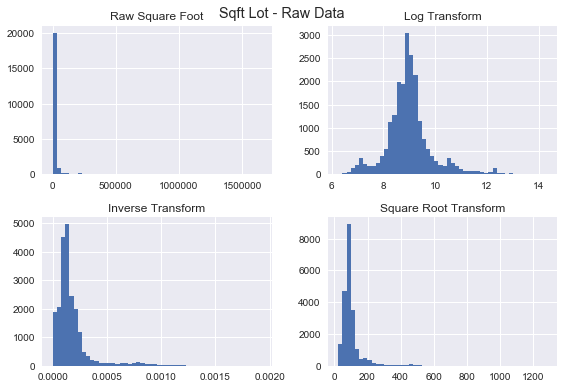

In [25]:
#perform normal distribution test on numerical data sqft_lot
data = df_house_sales_numerical["sqft_lot"].astype(float)
normal_distribution_test(data, 'square feet lot space', 0.05, 50)

data = np.log(df_house_sales_numerical["sqft_lot"].astype(float))
normal_distribution_test(data, 'log square feet living space raw data', 0.05, 50)

data = np.sqrt(df_house_sales_numerical["sqft_lot"].astype(float))
normal_distribution_test(data, 'sqrt square feet living space raw data', 0.05, 50)

data = 1/df_house_sales_numerical["sqft_lot"].astype(float)
normal_distribution_test(data, 'inverse square feet living space raw data', 0.05, 50)

data = df_house_sales_numerical["price"].astype(float)
normal_distribution_test(data, 'price', 0.05, 50)

# Making a four-panel plot for square foot living 2015 with transforms -raw
fig = plt.figure()
fig.suptitle("Sqft Lot - Raw Data")
fig.add_subplot(221)
plt.hist(df_house_sales_numerical['sqft_lot'],bins=50)
plt.title('Raw Square Foot')

fig.add_subplot(222)
plt.hist((np.log(df_house_sales_numerical['sqft_lot'])),bins=50)
plt.title('Log Transform')

fig.add_subplot(223)
plt.hist((1/df_house_sales_numerical['sqft_lot']),bins=50)
plt.title('Inverse Transform')

fig.add_subplot(224)
plt.hist((np.sqrt(df_house_sales_numerical['sqft_lot'])),bins=50)
plt.title('Square Root Transform')

plt.tight_layout()
plt.show()


### Conclusions from initial transforms
1. Log transform seems to make all 3 numerical variables more normally distributed but none of the transformations result in the variables passing the normal distribution test
2. The log transform of sqft_living comes close to pass with a p value of .02

## Testing to see if removing outliers results in a more normal distribution

In [26]:
# Remove the outliers based on 1.5x IQR
df_house_sales_numerical.sort_values('sqft_living', inplace=True)
df_house_sales_numerical.sort_values('sqft_lot', inplace=True)
df_house_sales_numerical.sort_values('sqft_living15', inplace=True)

#identify IQR for sqft_living
Q1_living = df_house_sales_numerical['sqft_living'].quantile(0.25)
Q3_living = df_house_sales_numerical['sqft_living'].quantile(0.75)
IQR_living = Q3_living - Q1_living

#identify IQR for sqft_living15
Q1_living15 = df_house_sales_numerical['sqft_living15'].quantile(0.25)
Q3_living15 = df_house_sales_numerical['sqft_living15'].quantile(0.75)
IQR_living15 = Q3_living15 - Q1_living15

#identify IQR for sqft lot
Q1_lot = df_house_sales_numerical['sqft_lot'].quantile(0.25)
Q3_lot = df_house_sales_numerical['sqft_lot'].quantile(0.75)
IQR_lot = Q3_lot - Q1_lot

#perform query that limits records to those that fall in the IQR for sqft_living, sqft_lot, sqft_living15
df_house_sales_numerical_minus_outliers = df_house_sales_numerical.query('(@Q1_living - 1.5 * @IQR_living) <= sqft_living <= (@Q3_living + 1.5 * @IQR_living) & \
(@Q1_living15 - 1.5 * @IQR_living15) <= sqft_living15 <= (@Q3_living15 + 1.5 * @IQR_living15)& \
(@Q1_lot - 1.5 * @IQR_lot) <= sqft_lot <= (@Q3_lot + 1.5 * @IQR_lot)')



 Outliers removed: 

        sqft_living      sqft_lot  sqft_living15         price
count  18668.000000  18668.000000   18668.000000  1.866800e+04
mean    1925.937272   7274.322156    1870.866081  4.914553e+05
std      723.486637   3556.518651     567.646600  2.635135e+05
min      370.000000    520.000000     460.000000  7.800000e+04
25%     1380.000000   4813.500000    1450.000000  3.100000e+05
50%     1820.000000   7199.500000    1760.000000  4.300000e+05
75%     2380.000000   9266.000000    2210.000000  6.000000e+05
max     4230.000000  19141.000000    3660.000000  3.100000e+06


In [33]:
# Perform the same transforms (log, inverse or square root) after removing outliers
df_house_sales_numerical_minus_outliers.loc[:,'sqft_living_log'] = np.log(df_house_sales_numerical_minus_outliers['sqft_living'])
df_house_sales_numerical_minus_outliers.loc[:,'sqft_living15_log'] = np.log(df_house_sales_numerical_minus_outliers['sqft_living15'])
df_house_sales_numerical_minus_outliers.loc[:,'sqft_lot_log'] = np.log(df_house_sales_numerical_minus_outliers['sqft_lot'])

df_house_sales_numerical_minus_outliers.loc[:,'sqft_living_inverse'] = 1/df_house_sales_numerical_minus_outliers['sqft_living']
df_house_sales_numerical_minus_outliers.loc[:,'sqft_living15_inverse'] = 1/df_house_sales_numerical_minus_outliers['sqft_living15']
df_house_sales_numerical_minus_outliers.loc[:,'sqft_lot_inverse'] = 1/df_house_sales_numerical_minus_outliers['sqft_lot']

df_house_sales_numerical_minus_outliers.loc[:,'sqft_living_sqrt'] = np.sqrt(df_house_sales_numerical_minus_outliers['sqft_living'])
df_house_sales_numerical_minus_outliers.loc[:,'sqft_living15_sqrt'] = np.sqrt(df_house_sales_numerical_minus_outliers['sqft_living15'])
df_house_sales_numerical_minus_outliers.loc[:,'sqft_lot_sqrt'] = np.sqrt(df_house_sales_numerical_minus_outliers['sqft_lot'])

print("Outliers removed, transforms: \n")
print(df_house_sales_numerical_minus_outliers.describe())

C:\Users\stace\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Outliers removed, transforms: 

        sqft_living      sqft_lot  sqft_living15         price  \
count  19188.000000  19188.000000   19188.000000  1.918800e+04   
mean    1992.544403   7383.938712    1918.222952  5.173518e+05   
std      830.589258   3622.891206     640.288949  3.237893e+05   
min      370.000000    520.000000     460.000000  7.800000e+04   
25%     1390.000000   4904.750000    1460.000000  3.150000e+05   
50%     1846.000000   7200.000000    1780.000000  4.390000e+05   
75%     2440.000000   9435.000000    2260.000000  6.226125e+05   
max     9640.000000  19141.000000    6110.000000  4.668000e+06   

       sqft_living_log  sqft_living15_log  sqft_lot_log  sqft_living_inverse  \
count     19188.000000       19188.000000  19188.000000         19188.000000   
mean          7.514644           7.508140      8.759190             0.000593   
std           0.408768           0.315832      0.599841             0.000255   
min           5.913503           6.131226      6.2538

square feet living space minus outliers : Variable is not normal:  0.0
log square feet living space : Variable is not normal:  5.39673396769e-09
inverse feet living space : Variable is not normal:  0.0
square root feet living space : Variable is not normal:  1.62860727573e-171


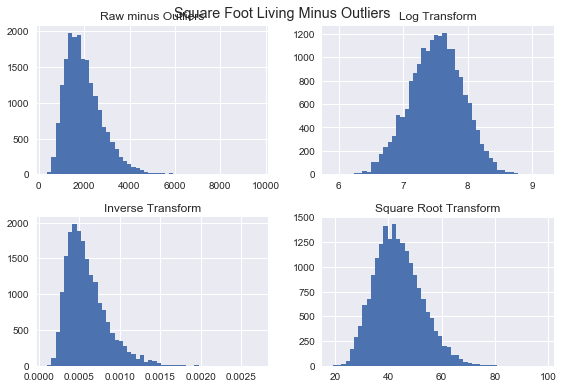

In [38]:
# test sqft living transforms for normality
data = df_house_sales_numerical_minus_outliers["sqft_living"].astype(float)
normal_distribution_test(data, 'square feet living space minus outliers', 0.05, 50)

data = df_house_sales_numerical_minus_outliers["sqft_living_log"].astype(float)
normal_distribution_test(data, 'log square feet living space', 0.05, 50)

data = df_house_sales_numerical_minus_outliers["sqft_living_inverse"].astype(float)
normal_distribution_test(data, 'inverse feet living space', 0.05, 50)

data = df_house_sales_numerical_minus_outliers["sqft_living_sqrt"].astype(float)
normal_distribution_test(data, 'square root feet living space', 0.05, 50)

# Making a four-panel plot for square foot living with transforms
fig = plt.figure()
fig.suptitle("Square Foot Living Minus Outliers")
fig.add_subplot(221)
plt.hist(df_house_sales_numerical_minus_outliers['sqft_living'],bins=50)
plt.title('Raw minus Outliers')

fig.add_subplot(222)
plt.hist(df_house_sales_numerical_minus_outliers['sqft_living_log'],bins=50)
plt.title('Log Transform')

fig.add_subplot(223)
plt.hist(df_house_sales_numerical_minus_outliers['sqft_living_inverse'],bins=50)
plt.title('Inverse Transform')

fig.add_subplot(224)
plt.hist(df_house_sales_numerical_minus_outliers['sqft_living_sqrt'],bins=50)
plt.title('Square Root Transform')

plt.tight_layout()
plt.show()


square feet living space 2015 minus outliers : Variable is not normal:  0.0
log square feet living 2015 space : Variable is not normal:  1.15924866451e-43
inverse feet living 2015 space : Variable is not normal:  0.0
square root feet living 2015 space : Variable is not normal:  9.12602435201e-131


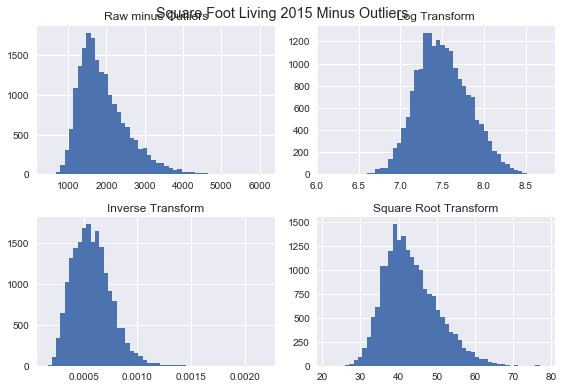

In [39]:
# test sqft living 2015 transforms for normality
data = df_house_sales_numerical_minus_outliers["sqft_living15"].astype(float)
normal_distribution_test(data, 'square feet living space 2015 minus outliers', 0.05, 50)

data = df_house_sales_numerical_transforms["sqft_living15_log"].astype(float)
normal_distribution_test(data, 'log square feet living 2015 space', 0.05, 50)

data = df_house_sales_numerical_transforms["sqft_living15_inverse"].astype(float)
normal_distribution_test(data, 'inverse feet living 2015 space', 0.05, 50)

data = df_house_sales_numerical_transforms["sqft_living15_sqrt"].astype(float)
normal_distribution_test(data, 'square root feet living 2015 space', 0.05, 50)

# Making a four-panel plot for square foot living 15 with transforms
fig2 = plt.figure()
fig2.suptitle("Square Foot Living 2015 Minus Outliers")
fig2.add_subplot(221)
plt.hist(df_house_sales_numerical_minus_outliers['sqft_living15'],bins=50)
plt.title('Raw minus Outliers')

fig2.add_subplot(222)
plt.hist(df_house_sales_numerical_minus_outliers['sqft_living15_log'],bins=50)
plt.title('Log Transform')

fig2.add_subplot(223)
plt.hist(df_house_sales_numerical_minus_outliers['sqft_living15_inverse'],bins=50)
plt.title('Inverse Transform')

fig2.add_subplot(224)
plt.hist(df_house_sales_numerical_minus_outliers['sqft_living15_sqrt'],bins=50)
plt.title('Square Root Transform')

plt.tight_layout()
plt.show()


square feet lot space minus outliers : Variable is not normal:  3.12241014661e-263
log square feet lot space : Variable is not normal:  0.0
inverse feet lot space : Variable is not normal:  0.0
square root feet lot space : Variable is not normal:  7.23039556036e-18


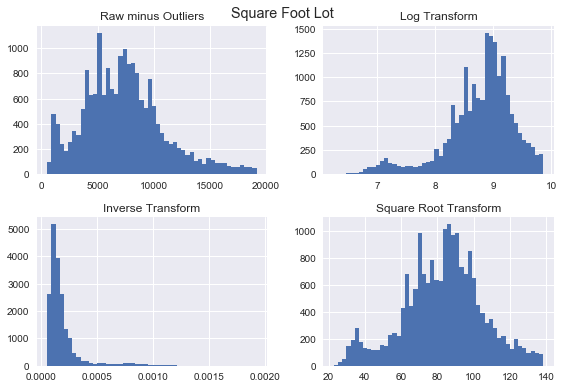

In [40]:
#test square foot lot minus outliers transforms for normality

data = df_house_sales_numerical_minus_outliers["sqft_lot"].astype(float)
normal_distribution_test(data, 'square feet lot space minus outliers', 0.05, 50)

data = df_house_sales_numerical_minus_outliers["sqft_lot_log"].astype(float)
normal_distribution_test(data, 'log square feet lot space', 0.05, 50)

data = df_house_sales_numerical_minus_outliers["sqft_lot_inverse"].astype(float)
normal_distribution_test(data, 'inverse feet lot space', 0.05, 50)

data = df_house_sales_numerical_minus_outliers["sqft_lot_sqrt"].astype(float)
normal_distribution_test(data, 'square root feet lot space', 0.05, 50)

# Making a four-panel plot for square foot lot with transforms
fig2 = plt.figure()
fig2.suptitle("Square Foot Lot")
fig2.add_subplot(221)
plt.hist(df_house_sales_numerical_minus_outliers['sqft_lot'],bins=50)
plt.title('Raw minus Outliers')

fig2.add_subplot(222)
plt.hist(df_house_sales_numerical_minus_outliers['sqft_lot_log'],bins=50)
plt.title('Log Transform')

fig2.add_subplot(223)
plt.hist(df_house_sales_numerical_minus_outliers['sqft_lot_inverse'],bins=50)
plt.title('Inverse Transform')

fig2.add_subplot(224)
plt.hist(df_house_sales_numerical_minus_outliers['sqft_lot_sqrt'],bins=50)
plt.title('Square Root Transform')

plt.tight_layout()
plt.show()

### Conclusions from removing outliers
1. Removing outliers did not improve the distribution for the sqft_living or sqft_living15 variables
2. Removing outliers and performing a square root transform seemed to improve the distribution of the square foot lot variable
3. I'll create new features using the log transform of the orignal dataset for sqft_living and sqft_living15 and the sqrt transform of the sqft_lot data

## Creating a dataset to hold features

In [45]:
features = pd.DataFrame()
# only remove outliers for sqft_lot
df_house_sales_numerical_minus_outliers = df_house_sales_numerical.query('(@Q1_lot - 1.5 * @IQR_lot) <= sqft_lot <= (@Q3_lot + 1.5 * @IQR_lot)')
df_house_sales_numerical_minus_outliers.loc[:,'sqft_lot_sqrt'] = np.sqrt(df_house_sales_numerical_minus_outliers['sqft_lot'])

#add new features
features['sqft_lot_sqrt'] = df_house_sales_numerical_minus_outliers['sqft_lot_sqrt']
features['sqft_living_log'] = df_house_sales_numerical_transforms['sqft_living_log']
features['sqft_living15_log'] = df_house_sales_numerical_transforms['sqft_living15_log']
features['price'] = df_house_sales_numerical['price']
features['price_per_sqft_lot'] = df_house_sales_numerical['price']/df_house_sales_numerical['sqft_lot']

features.head()

C:\Users\stace\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\stace\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,sqft_lot_sqrt,sqft_living_log,sqft_living15_log,price,price_per_sqft_lot
12106,96.254870,7.073270,6.131226,257500.0,27.792768
17286,89.526532,7.922986,6.131226,378000.0,47.161572
17887,68.992753,6.429719,6.429719,255000.0,53.571429
1920,68.992753,6.429719,6.429719,265000.0,55.672269
18049,70.142712,6.579251,6.507278,314000.0,63.821138


### Look at correlations between variables

                    bathrooms     grade  bedrooms  sqft_living  sqft_lot  \
bathrooms            1.000000  0.664983  0.515884     0.754665  0.087740   
grade                0.664983  1.000000  0.356967     0.762704  0.113621   
bedrooms             0.515884  0.356967  1.000000     0.576671  0.031703   
sqft_living          0.754665  0.762704  0.576671     1.000000  0.172826   
sqft_lot             0.087740  0.113621  0.031703     0.172826  1.000000   
sqft_living15        0.568634  0.713202  0.391638     0.756420  0.144608   
price                0.525138  0.667434  0.308350     0.702035  0.089661   
price_per_sqft_lot   0.202121  0.218254 -0.062342     0.022541 -0.206367   

                    sqft_living15     price  price_per_sqft_lot  
bathrooms                0.568634  0.525138            0.202121  
grade                    0.713202  0.667434            0.218254  
bedrooms                 0.391638  0.308350           -0.062342  
sqft_living              0.756420  0.702035        

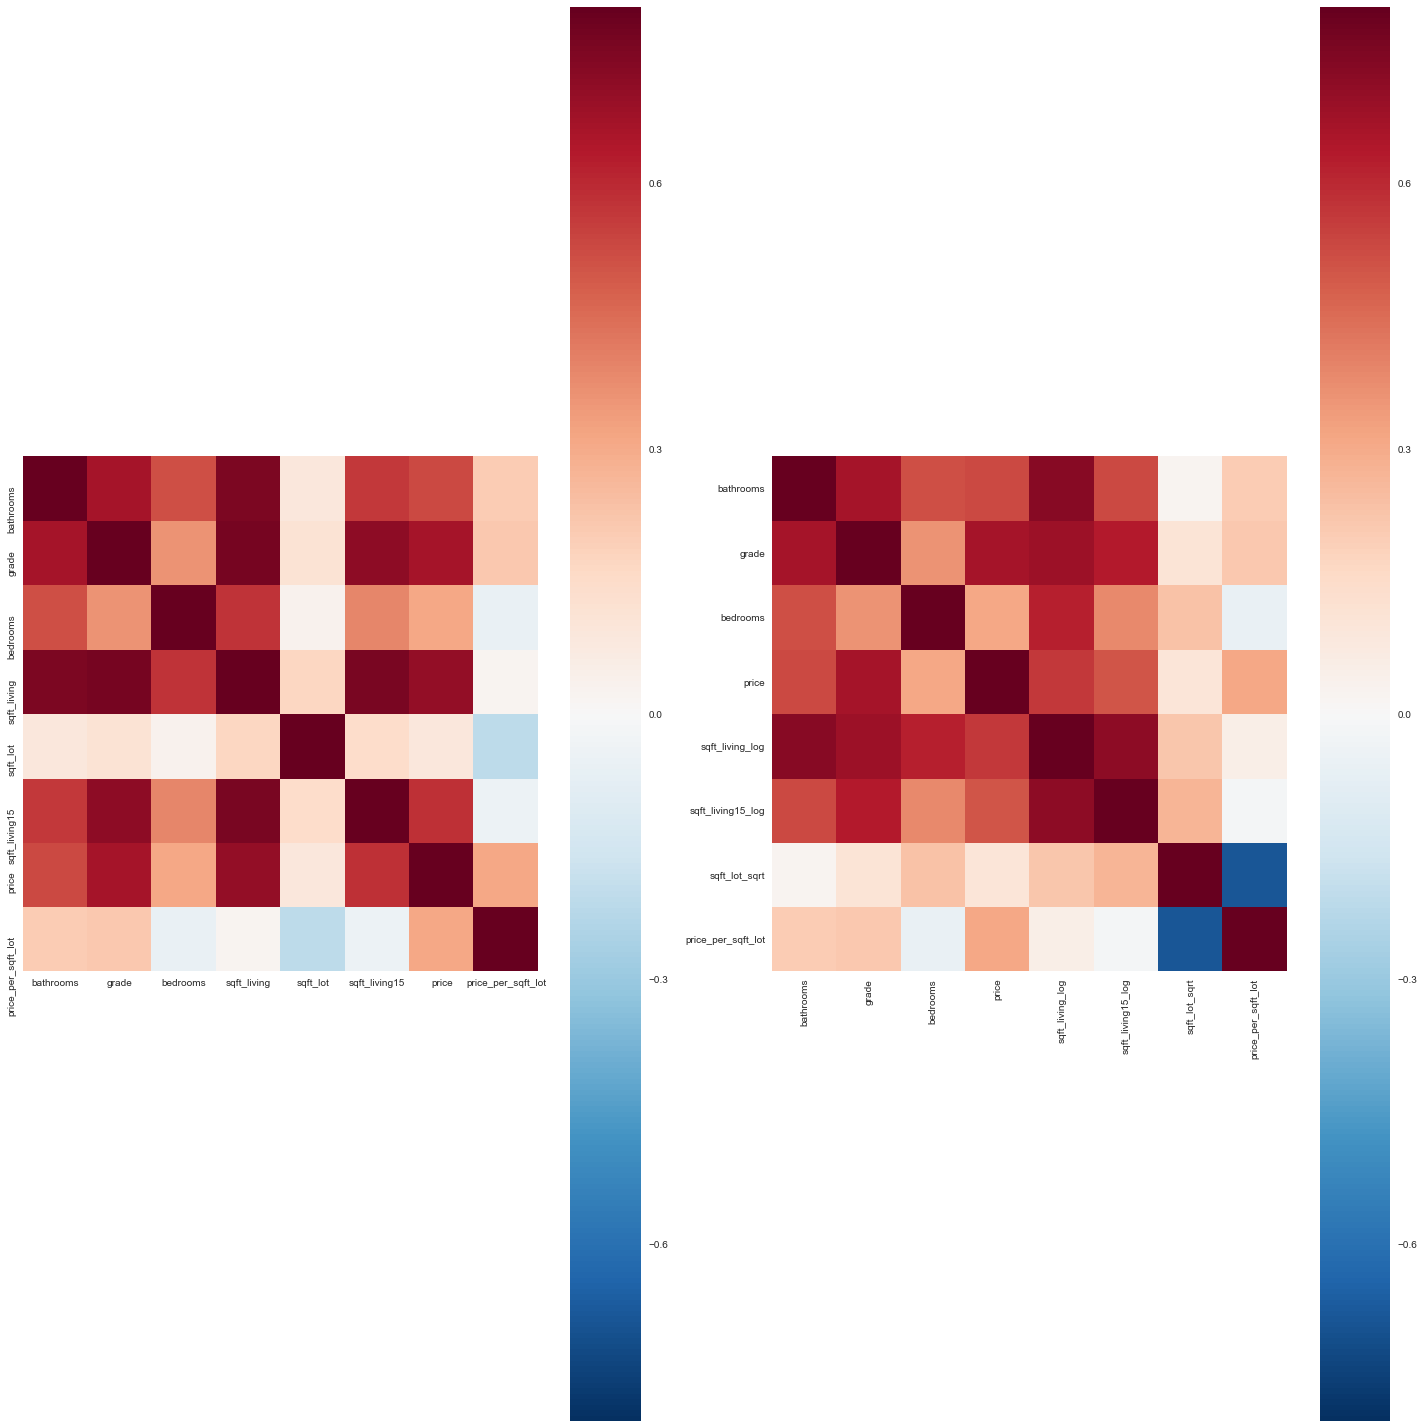

In [47]:
#pair-wise correlations between original variables

df_corr = df_input_file.loc[:, ['bathrooms','grade','bedrooms','sqft_living','sqft_lot','sqft_living15','price']]
df_corr['price_per_sqft_lot'] = df_corr['price']/df_corr['sqft_lot']
corrmat = df_corr.corr()
print(corrmat)

# Make the correlation matrix.
df_corr_transform = df_input_file.loc[:, ['bathrooms','grade','bedrooms','price']]
df_corr_transform['sqft_living_log']=df_house_sales_numerical_transforms['sqft_living_log']
df_corr_transform['sqft_living15_log']=df_house_sales_numerical_transforms['sqft_living15_log']
df_corr_transform['sqft_lot_sqrt'] = df_house_sales_numerical_minus_outliers['sqft_lot_sqrt']
df_corr_transform['price_per_sqft_lot'] = df_corr['price']/df_corr['sqft_lot']
corrmat2 = df_corr_transform.corr()
print(corrmat2)

# Plot the original data heat map and the current features heat map side by side
# Set up the matplotlib figure.
f= plt.figure(figsize=(20,20))

# Draw the heatmap using seaborn.
f.add_subplot(121)
sns.heatmap(corrmat, vmax=.8, square=True)

f.add_subplot(122)
sns.heatmap(corrmat2, vmax=.8, square=True)
plt.tight_layout()
plt.show()

### Conclusions from correlation matrix
1. Bathrooms, grade and bedrooms are all strongly correlated with each other - I'll try combining them into different features
2. Sqft_lot is not strongly correlated with price but strongly inversely correlated with price per sqft (I'm not sure how I can use a result that requires a calculation with the outcome variable but it's a really interesting result so I'll keep it with my feature set)
3. Not surprisingly, sqft_living and sqft_living15 are strongly correlated - I'll combine them into a single feature

In [66]:
# combine sqft_living15/sqft_lot
means = features[['sqft_living_log','sqft_living15_log']].mean(axis=0)
stds = features[['sqft_living_log','sqft_living15_log']].std(axis=0)
features['sqft_living_original_renovated'] = ((features[['sqft_living_log','sqft_living15_log']]).mean(axis=1))

# Check how well the composite correlates with each of the individual variables.
plotdf = df_house_sales_numerical_transforms.loc[:, ['sqft_living_log', 'sqft_living15_log']]
plotdf['sqft_living_original_renovated'] = features['sqft_living_original_renovated']
corrmat_combined_feature = plotdf.corr()
#print(corrmat_combined_feature)

print(features.head())


       sqft_lot_sqrt  sqft_living_log  sqft_living15_log     price  \
12106      96.254870         7.073270           6.131226  257500.0   
17286      89.526532         7.922986           6.131226  378000.0   
17887      68.992753         6.429719           6.429719  255000.0   
1920       68.992753         6.429719           6.429719  265000.0   
18049      70.142712         6.579251           6.507278  314000.0   

       price_per_sqft_lot  sqft_living_original_renovated  beds_and_bath  \
12106           27.792768                        6.602248      -0.811465   
17286           47.161572                        7.027106       1.125938   
17887           53.571429                        6.429719      -1.460678   
1920            55.672269                        6.429719      -1.460678   
18049           63.821138                        6.543264      -1.460678   

       grade_and_bath  Small_Lots  below_code_grade  
12106       -0.353913           1                 1  
17286        0

ValueError: max must be larger than min in range parameter.

In [64]:
# combine bedrooms and bathrooms
means = df_house_sales_categorical[['bedrooms','bathrooms']].mean(axis=0)
stds = df_house_sales_categorical[['bedrooms','bathrooms']].std(axis=0)
features['beds_and_bath'] = ((df_house_sales_categorical[['bedrooms','bathrooms']]- means)/ stds).mean(axis=1)


# Check how well the composite correlates with each of the individual variables.
plotdf_bedsbath = df_house_sales_categorical.loc[:, ['bedrooms', 'bathrooms']]
plotdf_bedsbath['beds_and_bath'] = features['beds_and_bath']
corrmat_combined_bedsbath = plotdf_bedsbath.corr()
print(corrmat_combined_bedsbath)

               bedrooms  bathrooms  beds_and_bath
bedrooms       1.000000   0.515884       0.873175
bathrooms      0.515884   1.000000       0.864521
beds_and_bath  0.873175   0.864521       1.000000


In [50]:
# combine grade and bathrooms
means = df_house_sales_categorical[['grade','bathrooms']].mean(axis=0)
stds = df_house_sales_categorical[['grade','bathrooms']].std(axis=0)
features['grade_and_bath'] = ((df_house_sales_categorical[['grade','bathrooms']]- means)/ stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf_gradebath = df_house_sales_categorical.loc[:, ['grade', 'bathrooms']]
plotdf_gradebath['grade_and_bath'] = features['grade_and_bath']
corrmat_combined_gradebath = plotdf_gradebath.corr()
print("Checking correlation between original variables and combined grade and bath: \n")
print(corrmat_combined_gradebath)


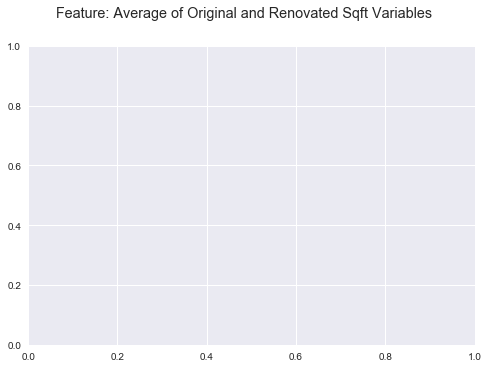

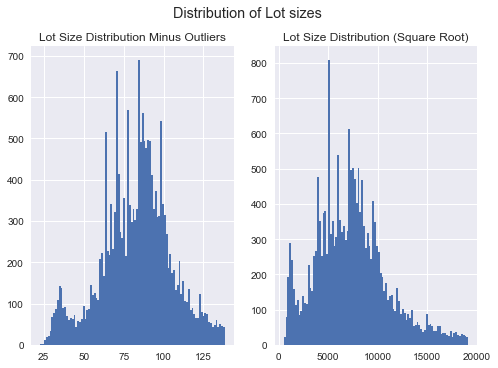

Descriptive Stats of Lot Size - Small/Large:

Small_Lots       
0           count     1459.000000
            mean      1478.961618
            std        459.411826
            min        520.000000
            25%       1137.000000
            50%       1361.000000
            75%       1824.000000
            max       2496.000000
1           count    17729.000000
            mean      7869.886119
            std       3329.017737
            min       2500.000000
            25%       5250.000000
            50%       7439.000000
            75%       9605.000000
            max      19141.000000
Name: sqft_lot, dtype: float64
Descriptive Stats of Price based on Small/Large lot size:

Small_Lots       
0           count     1459.000000
            mean       331.845703
            std        144.536825
            min         36.144578
            25%        233.600999
            50%        319.923208
            75%        405.247703
            max       2027.208539
1           

In [67]:
# categorizing lot size into a new feature
fig_lot = plt.figure()
fig_lot.suptitle("Distribution of Lot sizes")
fig_lot.add_subplot(121)
plt.title('Square root of Lot Size')
plt.hist(features['sqft_lot_sqrt'],bins=100)
plt.title('Lot Size Distribution Minus Outliers')
fig_lot.add_subplot(122)
plt.title('Lot Size Distribution (Square Root)')
plt.hist(df_house_sales_numerical_minus_outliers['sqft_lot'],bins=100)
plt.show()

# Creating a feature to represent small lots with a cutoff based on the distribution
features['Small_Lots'] = np.where(df_house_sales_numerical_minus_outliers['sqft_lot_sqrt'] < 50, 0, 1)
print("Descriptive Stats of Lot Size - Small/Large:\n")
print(df_house_sales_numerical_minus_outliers['sqft_lot'].groupby(features['Small_Lots']).describe())

print("Descriptive Stats of Price based on Small/Large lot size:\n")
print(features['price_per_sqft_lot'].groupby(features['Small_Lots']).describe())


In [69]:
# feature does not meet code
df_house_sales_categorical['below_code_grade'] = np.where(df_house_sales_categorical['grade'] < 6, 0, 1)
features['below_code_grade'] = df_house_sales_categorical['below_code_grade']

print("Descriptive Stats of Grade: Doesn't/Does Meet Code\n")
print(df_house_sales_categorical['grade'].groupby(features['below_code_grade']).describe())

print("Descriptive Stats of Price based on Building Grade:\n")
print(features['price_per_sqft_lot'].groupby(features['below_code_grade']).describe())

Descriptive Stats of Grade: Doesn't/Does Meet Code

below_code_grade       
0.0               count      222.000000
                  mean         4.896396
                  std          0.319906
                  min          3.000000
                  25%          5.000000
                  50%          5.000000
                  75%          5.000000
                  max          5.000000
1.0               count    18966.000000
                  mean         7.602710
                  std          1.056621
                  min          6.000000
                  25%          7.000000
                  50%          7.000000
                  75%          8.000000
                  max         13.000000
Name: grade, dtype: float64
Descriptive Stats of Price based on Building Grade:

below_code_grade       
0                 count      222.000000
                  mean        40.683137
                  std         33.471080
                  min          4.772394
                  2

In [68]:
# group bathrooms by rounding up to integers as new features to see if they still represent the strong correlation with price

df_house_sales_categorical['one_bathroom'] = np.where((df_house_sales_categorical['bathrooms'].isin([1, 0.75,0.5])), 1, 0)
df_house_sales_categorical['two_bathrooms'] = np.where((df_house_sales_categorical['bathrooms'].isin([1.25, 1.75,1.5,2])), 1, 0)
df_house_sales_categorical['three_bathrooms'] = np.where((df_house_sales_categorical['bathrooms'].isin([2.25, 2.75,2.5,3])), 1, 0)
df_house_sales_categorical['4_plus_bathrooms'] = np.where(df_house_sales_categorical['bathrooms'] >= 3.25, 1, 0)

features['one_bathroom'] = df_house_sales_categorical['one_bathroom']
features['two_bathrooms'] = df_house_sales_categorical['two_bathrooms']
features['three_bathrooms'] = df_house_sales_categorical['three_bathrooms']
features['4_plus_bathrooms'] = df_house_sales_categorical['4_plus_bathrooms']
features['price'] = df_house_sales_numerical_transforms['price']

print(pd.crosstab(features['one_bathroom'], df_house_sales_categorical['bathrooms']))
print(pd.crosstab(features['two_bathrooms'], df_house_sales_categorical['bathrooms']))
print(pd.crosstab(features['three_bathrooms'], df_house_sales_categorical['bathrooms']))
print(pd.crosstab(features['4_plus_bathrooms'], df_house_sales_categorical['bathrooms']))


bathrooms     0.00  0.50  0.75  1.00  1.25  1.50  1.75  2.00  2.25  2.50  \
one_bathroom                                                               
0.0              5     0     0     0     9  1343  2741  1766  1803  4714   
1.0              0     4    54  3620     0     0     0     0     0     0   

bathrooms     ...   4.50  4.75  5.00  5.25  5.50  5.75  6.00  6.50  6.75  7.50  
one_bathroom  ...                                                               
0.0           ...     73    15    12     8     5     1     1     1     1     1  
1.0           ...      0     0     0     0     0     0     0     0     0     0  

[2 rows x 27 columns]
bathrooms      0.00  0.50  0.75  1.00  1.25  1.50  1.75  2.00  2.25  2.50  \
two_bathrooms                                                               
0.0               5     4    54  3620     0     0     0     0  1803  4714   
1.0               0     0     0     0     9  1343  2741  1766     0     0   

bathrooms      ...   4.50  4.75  5.00  

### Summarize Feature List and Select 5

In [70]:
# Identify variables in dataset
columns = list(features)
print(columns)

['sqft_lot_sqrt', 'sqft_living_log', 'sqft_living15_log', 'price', 'price_per_sqft_lot', 'sqft_living_original_renovated', 'beds_and_bath', 'grade_and_bath', 'Small_Lots', 'below_code_grade', 'one_bathroom', 'two_bathrooms', 'three_bathrooms', '4_plus_bathrooms']


### List of features
1.sqft_lot_sqrt
2.sqft_living_log
3. sqft_living15_log
4. sqft_living_original_renovated
5. beds_and_bath
6. grade_and_bath
7. Small_Lots
8. below_code_grade
9. one_bathroom, two_bathrooms, three_bathrooms, 4_plus_bathrooms
10. price_per_sqft_lot

                                sqft_lot_sqrt  sqft_living_log  \
sqft_lot_sqrt                        1.000000         0.224684   
sqft_living_log                      0.224684         1.000000   
sqft_living15_log                    0.273648         0.712917   
price                                0.023243         0.566890   
price_per_sqft_lot                  -0.681889         0.052568   
sqft_living_original_renovated       0.265391         0.944411   
beds_and_bath                        0.148157         0.777555   
grade_and_bath                       0.070507         0.786021   
Small_Lots                           0.592051         0.191945   
below_code_grade                    -0.002775         0.208143   
one_bathroom                        -0.016777        -0.599184   
two_bathrooms                        0.036698        -0.146338   
three_bathrooms                     -0.031603         0.475979   
4_plus_bathrooms                     0.020849         0.301573   

         

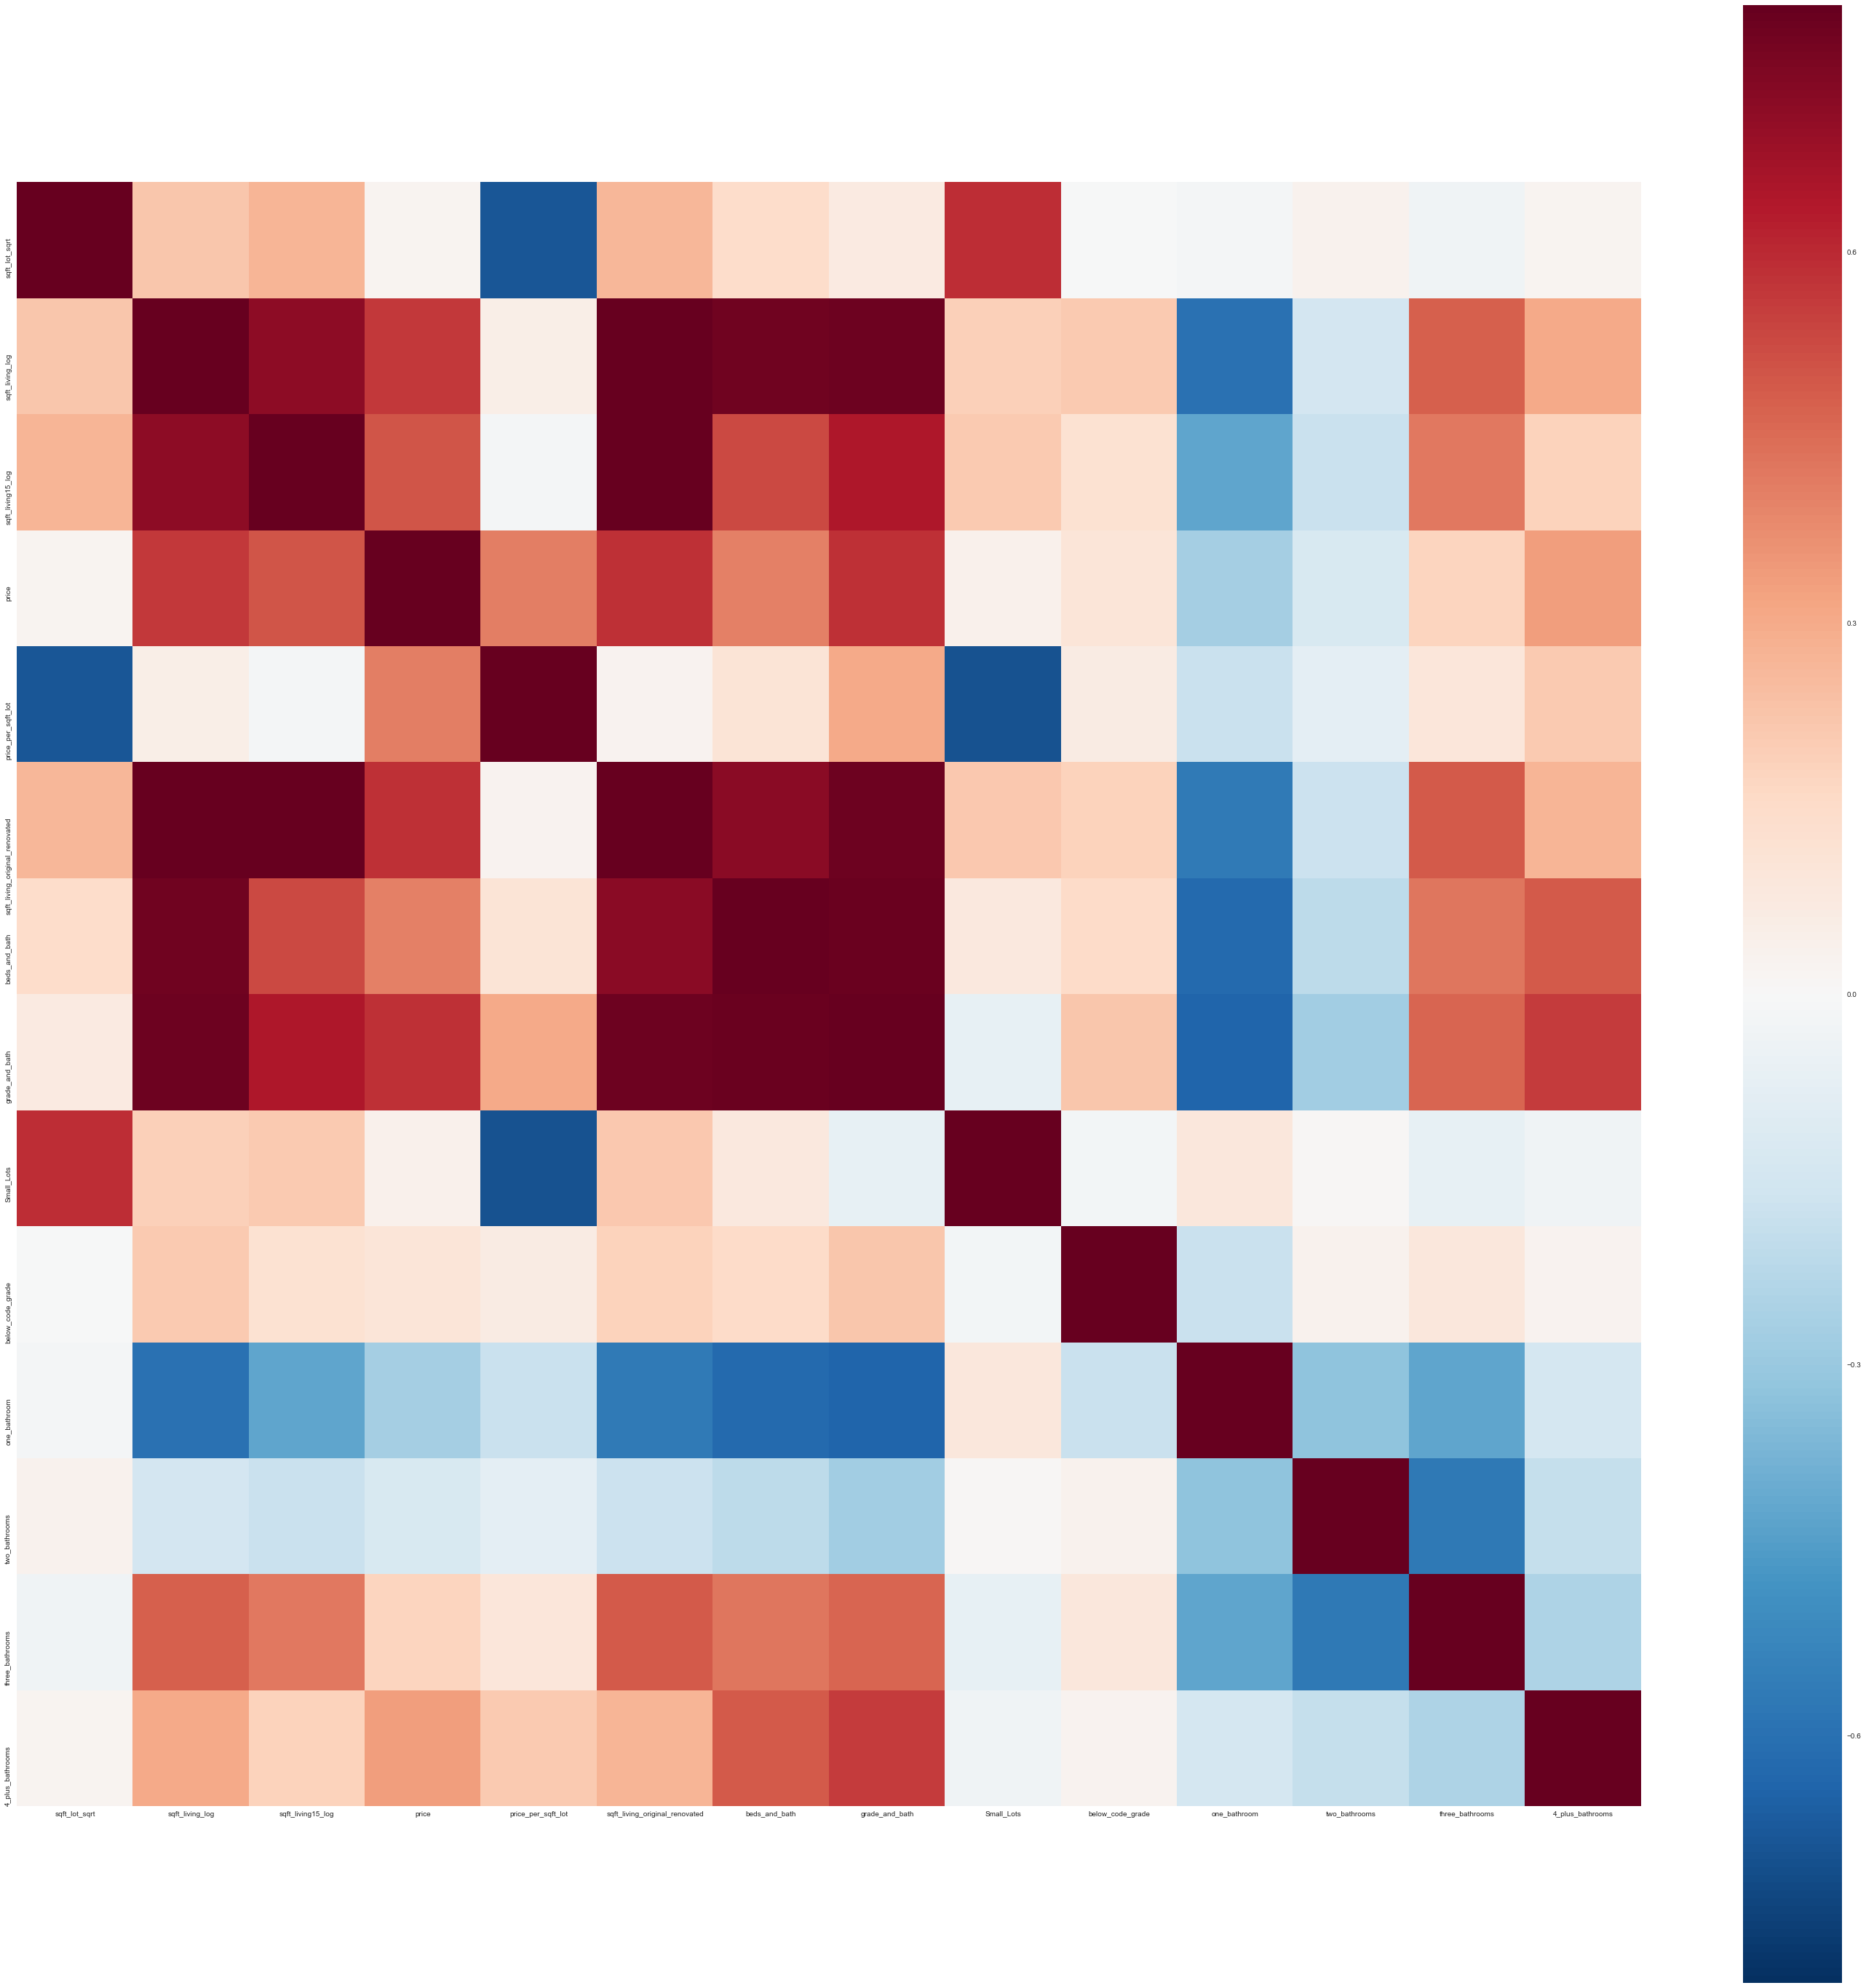

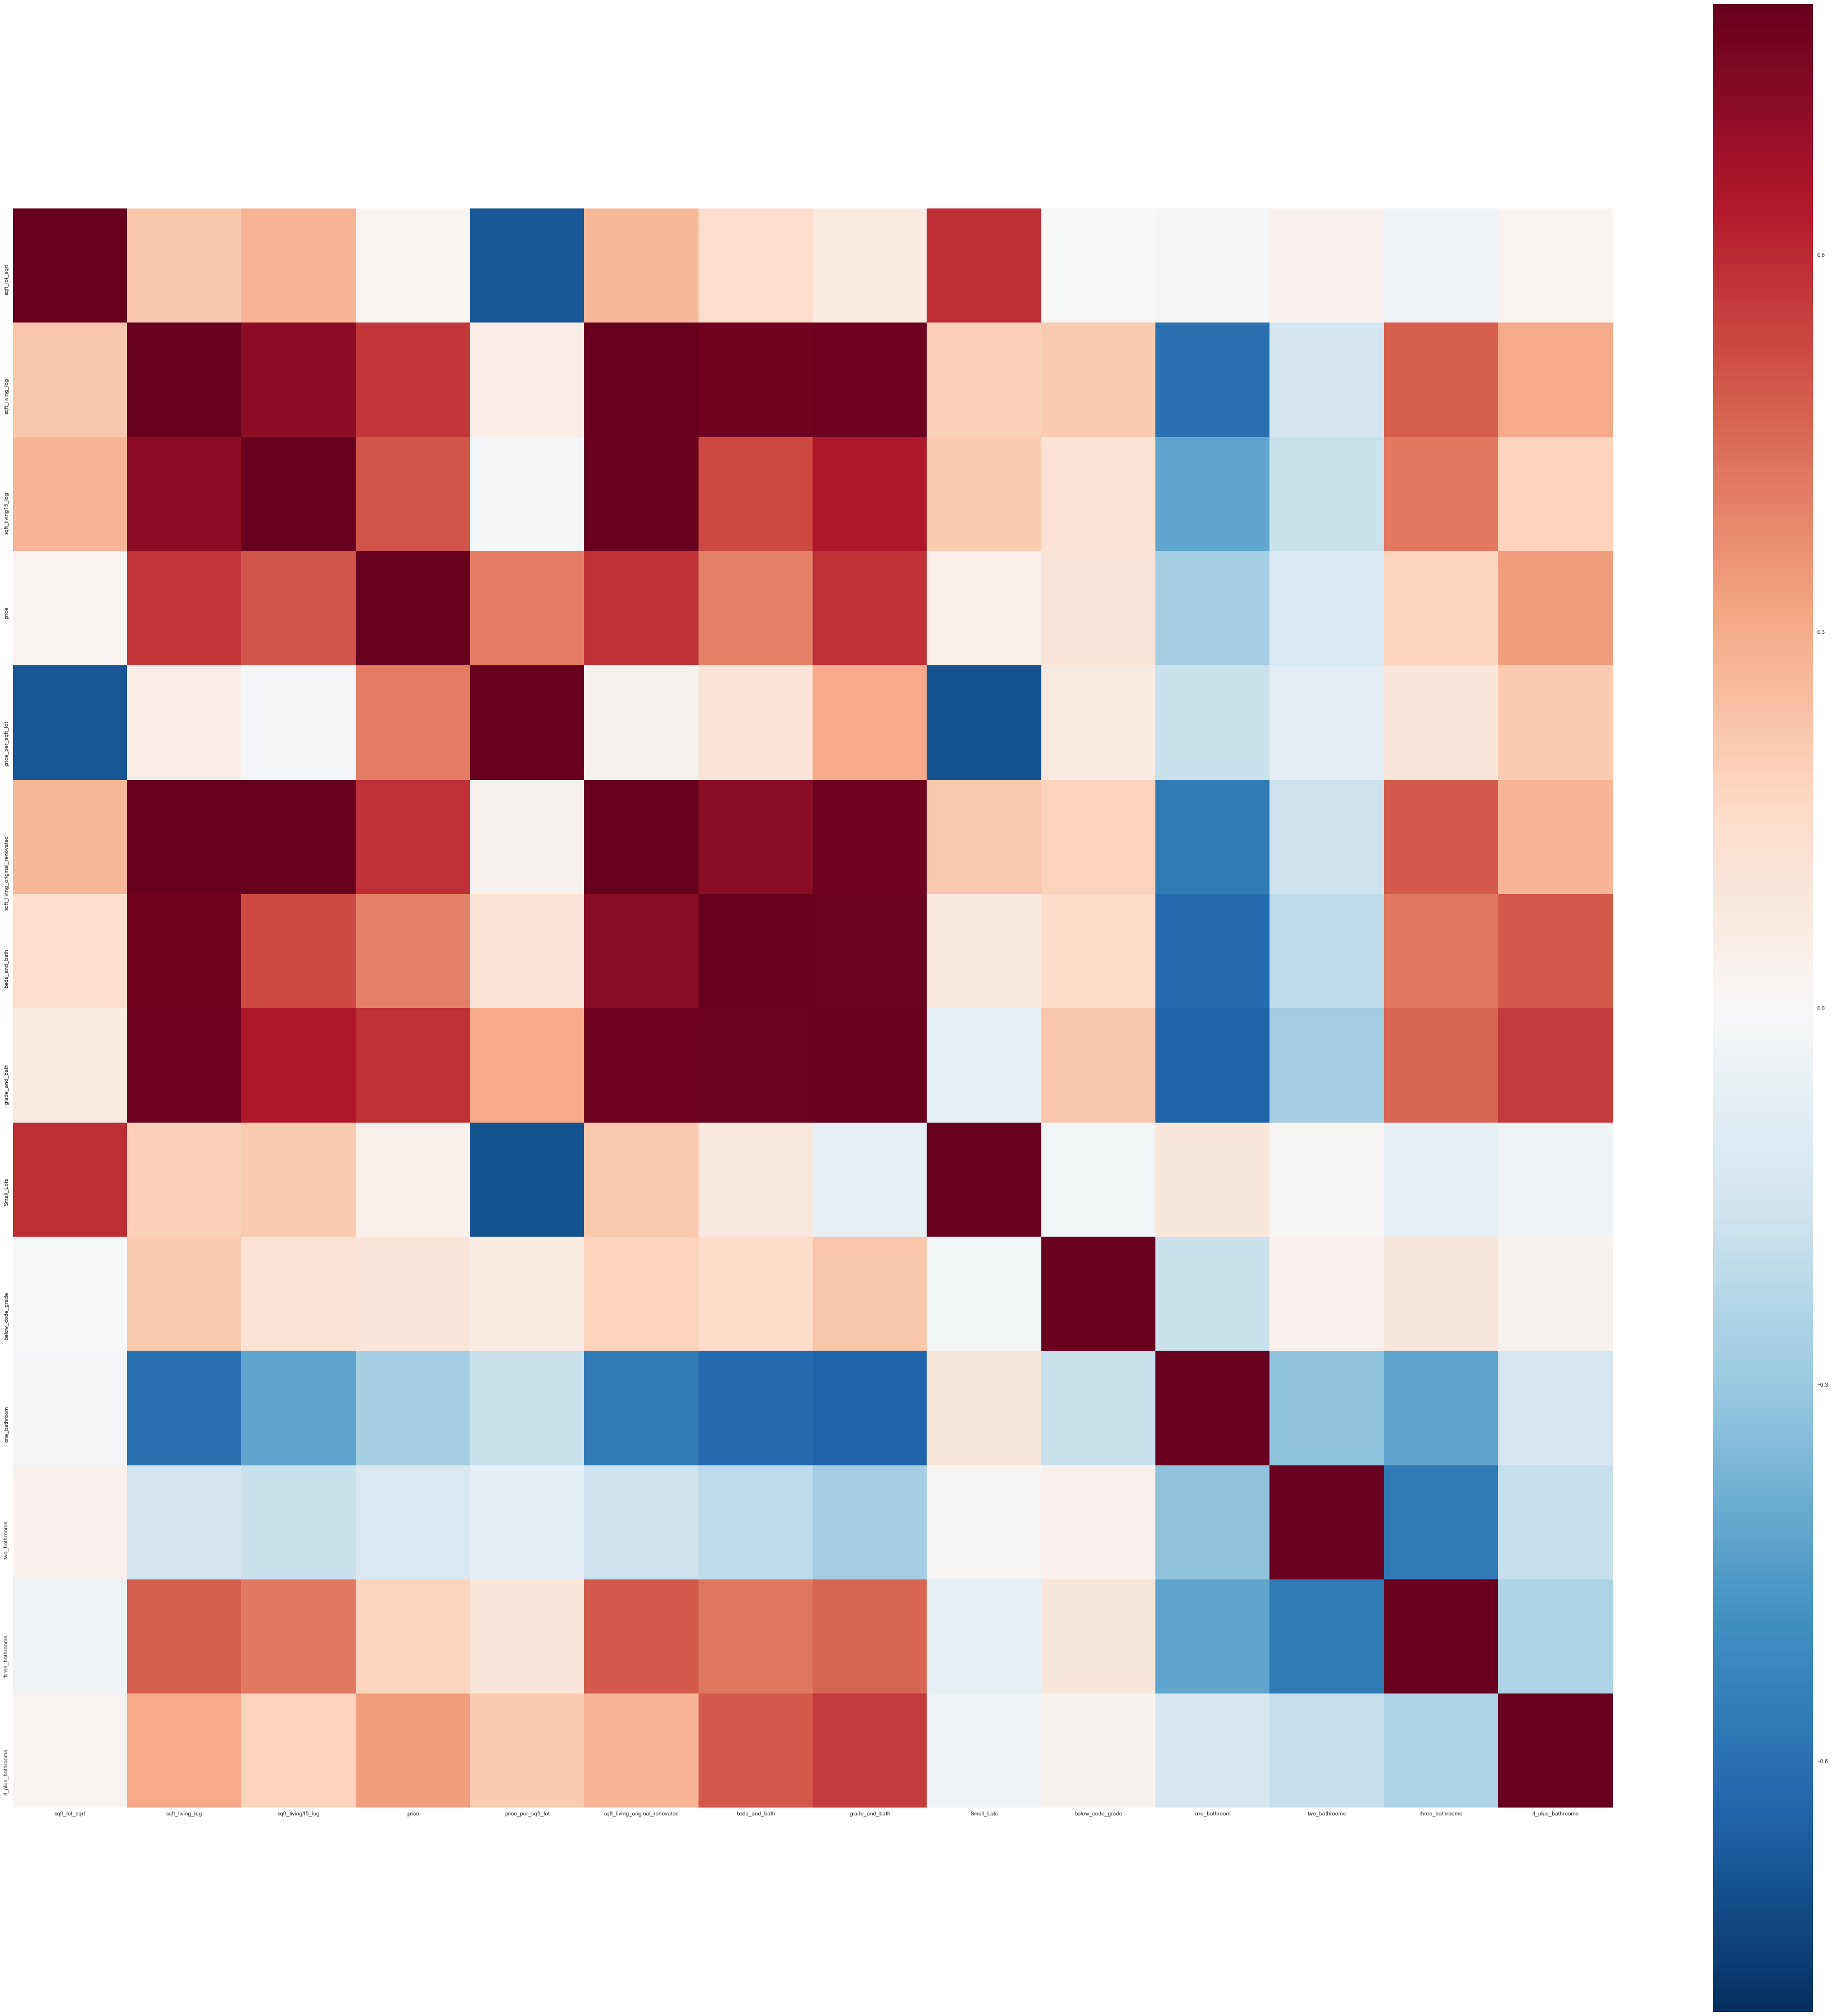

In [73]:
corrmat_combined_features = features.corr()
print(corrmat_combined_features)

f_feature= plt.figure(figsize=(50,50))
sns.heatmap(corrmat_combined_features, vmax=.8, square=True)
plt.tight_layout()
plt.show()

### Selection of 5 Features
Some of the original variables still make the best features based on the correlation to the outcome.

Based on strong correlations to outcome:
1. Grade (using the original variable as a feature because of strong correlation to price .7)
2. Sqft_living_log - still a strong correlation but with a more normal distribution
3. sqft_living_original_renovated 
4. grade_and_bath
5. Bath (original data)